In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

In [ ]:
#!pip install plot_confusion_matrix

In [ ]:

# Import the datasets separately
red_wine = pd.read_csv("/content/wine-quality Red.csv")


# Display the first few rows of the combined data
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Create the labels set `y` and features DataFrame `X`
y = red_wine["quality"]
X = red_wine.drop(columns="quality")

In [ ]:
#red_encoded = pd.get_dummies(wine_data, columns=['type'])

In [ ]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
# Assuming the 'quality' column contains wine quality levels

# Define a function to map quality levels to two classes
def classify_quality(quality):
    if quality >= 3 and quality <= 5:
        return 0
    elif quality >= 6 and quality <= 8:
        return 1
    else:
        return None  # If any other value exists

# Apply the function to create a new column 'quality_class'
red_wine['quality_class'] = red_wine['quality'].apply(classify_quality)

# Check the first few rows to verify the transformation
print(red_wine[['quality', 'quality_class']].head(10))

   quality  quality_class
0        5              0
1        5              0
2        5              0
3        6              1
4        5              0
5        5              0
6        5              0
7        7              1
8        7              1
9        5              0


In [ ]:
y.value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
y = red_wine["quality_class"]
X = red_wine.drop(columns=["quality", "quality_class"])

In [ ]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
red_scaled= StandardScaler()

In [ ]:
# Fit the Standard Scaler with the training data
X_scaler = red_scaled.fit(X_train)

In [ ]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression

In [ ]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=1)

lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [ ]:
# Make and save testing predictions with the saved logistic regression model using the test data
logistic_testing_predictions = lr_model.predict(X_test_scaled)

# Review the predictions
logistic_testing_predictions

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,

In [ ]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, logistic_testing_predictions)


0.7375

<Figure size 640x480 with 0 Axes>

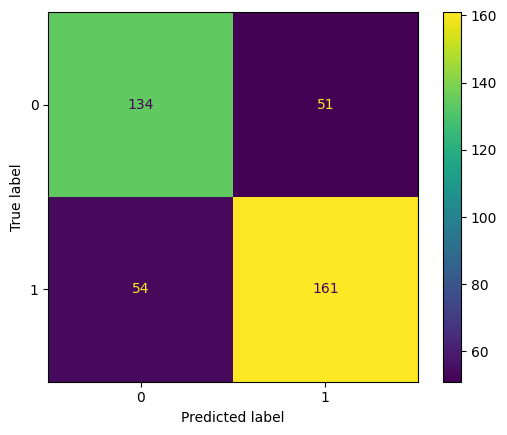

In [ ]:
plt.figure()
cm = confusion_matrix(y_test, logistic_testing_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
cm_display.plot()
plt.show()
